In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df=df.replace({True: 1, False: 0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
u1=df['sex'].unique()
u2=df['cp'].unique()
u3=df['fbs'].unique()
u4=df['restecg'].unique()
u5=df['exang'].unique()
u6=df['slope'].unique()
u7=df['thal'].unique()
print (u1)
print (u2)
print (u3)
print (u4)
print (u5)
print (u6)
print (u7)

['Male' 'Female']
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
[1 0]
['lv hypertrophy' 'normal' 'st-t abnormality']
['FALSE' 'TRUE' 'TURE']
['downsloping' 'flat' 'upsloping']
['fixed defect' 'normal' 'reversable defect']


In [6]:
## Define the mapping dictionary


In [7]:
df['sex']=df['sex'].map({'Male':1,'Female':2})
df['cp']=df['cp'].map({'typical angina':1,'atypical angina':2,'asymptomatic':3,'non-anginal':4})
df['restecg']=df['restecg'].map({'lv hypertrophy':1,'normal':2,'st-t abnormality':3})
df['exang']=df['exang'].map({'TRUE':1,'FALSE':0,'TURE':1})
df['slope']=df['slope'].map({'downsloping':1,'flat':2,'upsloping':3})
df['thal']=df['thal'].map({'fixed defect':1,'normal':2,'reversable defect':3})
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,1,145,233,1,1,150,0,2.3,1,1,0
1,41,1,2,135,203,0,2,132,0,0.0,2,1,0
2,57,1,3,140,192,0,2,148,0,0.4,2,1,0
3,52,1,1,118,186,0,1,190,0,0.0,2,1,0
4,57,1,3,110,201,0,2,126,1,1.5,2,1,0


In [8]:
df.isna().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df.shape


(908, 13)

In [12]:
df.dropna(subset=["oldpeak"], inplace=True)

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
df.shape

(846, 13)

In [15]:
#Split the dataset into input and output/target columns

# input columns: 
x = df.iloc[:, 0:12].values

# output columns:
y = df.iloc[:, 12]

In [16]:
#Preprocessing our input columns

from sklearn.preprocessing import StandardScaler


In [17]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
#Split the data into train and test set

from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
#Metrics to measure our model performance:

from sklearn.metrics import accuracy_score, confusion_matrix


In [23]:
print("Accuracy score: ", accuracy_score(y_test, dt.predict(x_test)))


Accuracy score:  0.5235294117647059


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

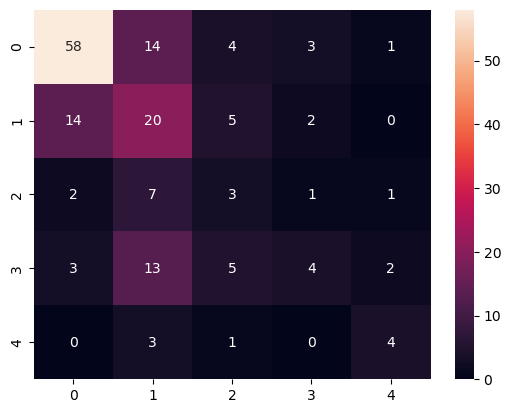

In [25]:
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)), annot=True)


In [26]:
#Visualization of the decision tree:

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [28]:
cols =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal', 'num']

In [30]:
pip install graphviz

     ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[Text(0.46969258557800225, 0.9705882352941176, 'exang <= 0.218\ngini = 0.684\nsamples = 676\nvalue = [298, 209, 87, 64, 18]'),
 Text(0.1989250140291807, 0.9117647058823529, 'chol <= -1.435\ngini = 0.554\nsamples = 408\nvalue = [254, 88, 38, 20, 8]'),
 Text(0.05864197530864197, 0.8529411764705882, 'thalch <= -1.609\ngini = 0.722\nsamples = 66\nvalue = [10, 25, 20, 9, 2]'),
 Text(0.02244668911335578, 0.7941176470588235, 'oldpeak <= 0.008\ngini = 0.66\nsamples = 10\nvalue = [0, 2, 2, 5, 1]'),
 Text(0.017957351290684626, 0.7352941176470589, 'age <= 0.228\ngini = 0.735\nsamples = 7\nvalue = [0, 2, 2, 2, 1]'),
 Text(0.008978675645342313, 0.6764705882352942, 'thalch <= -1.941\ngini = 0.625\nsamples = 4\nvalue = [0, 0, 2, 1, 1]'),
 Text(0.004489337822671156, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.013468013468013467, 0.6176470588235294, 'cp <= -0.568\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 1]'),
 Text(0.008978675645342313, 0.5588235294117647, 'gi

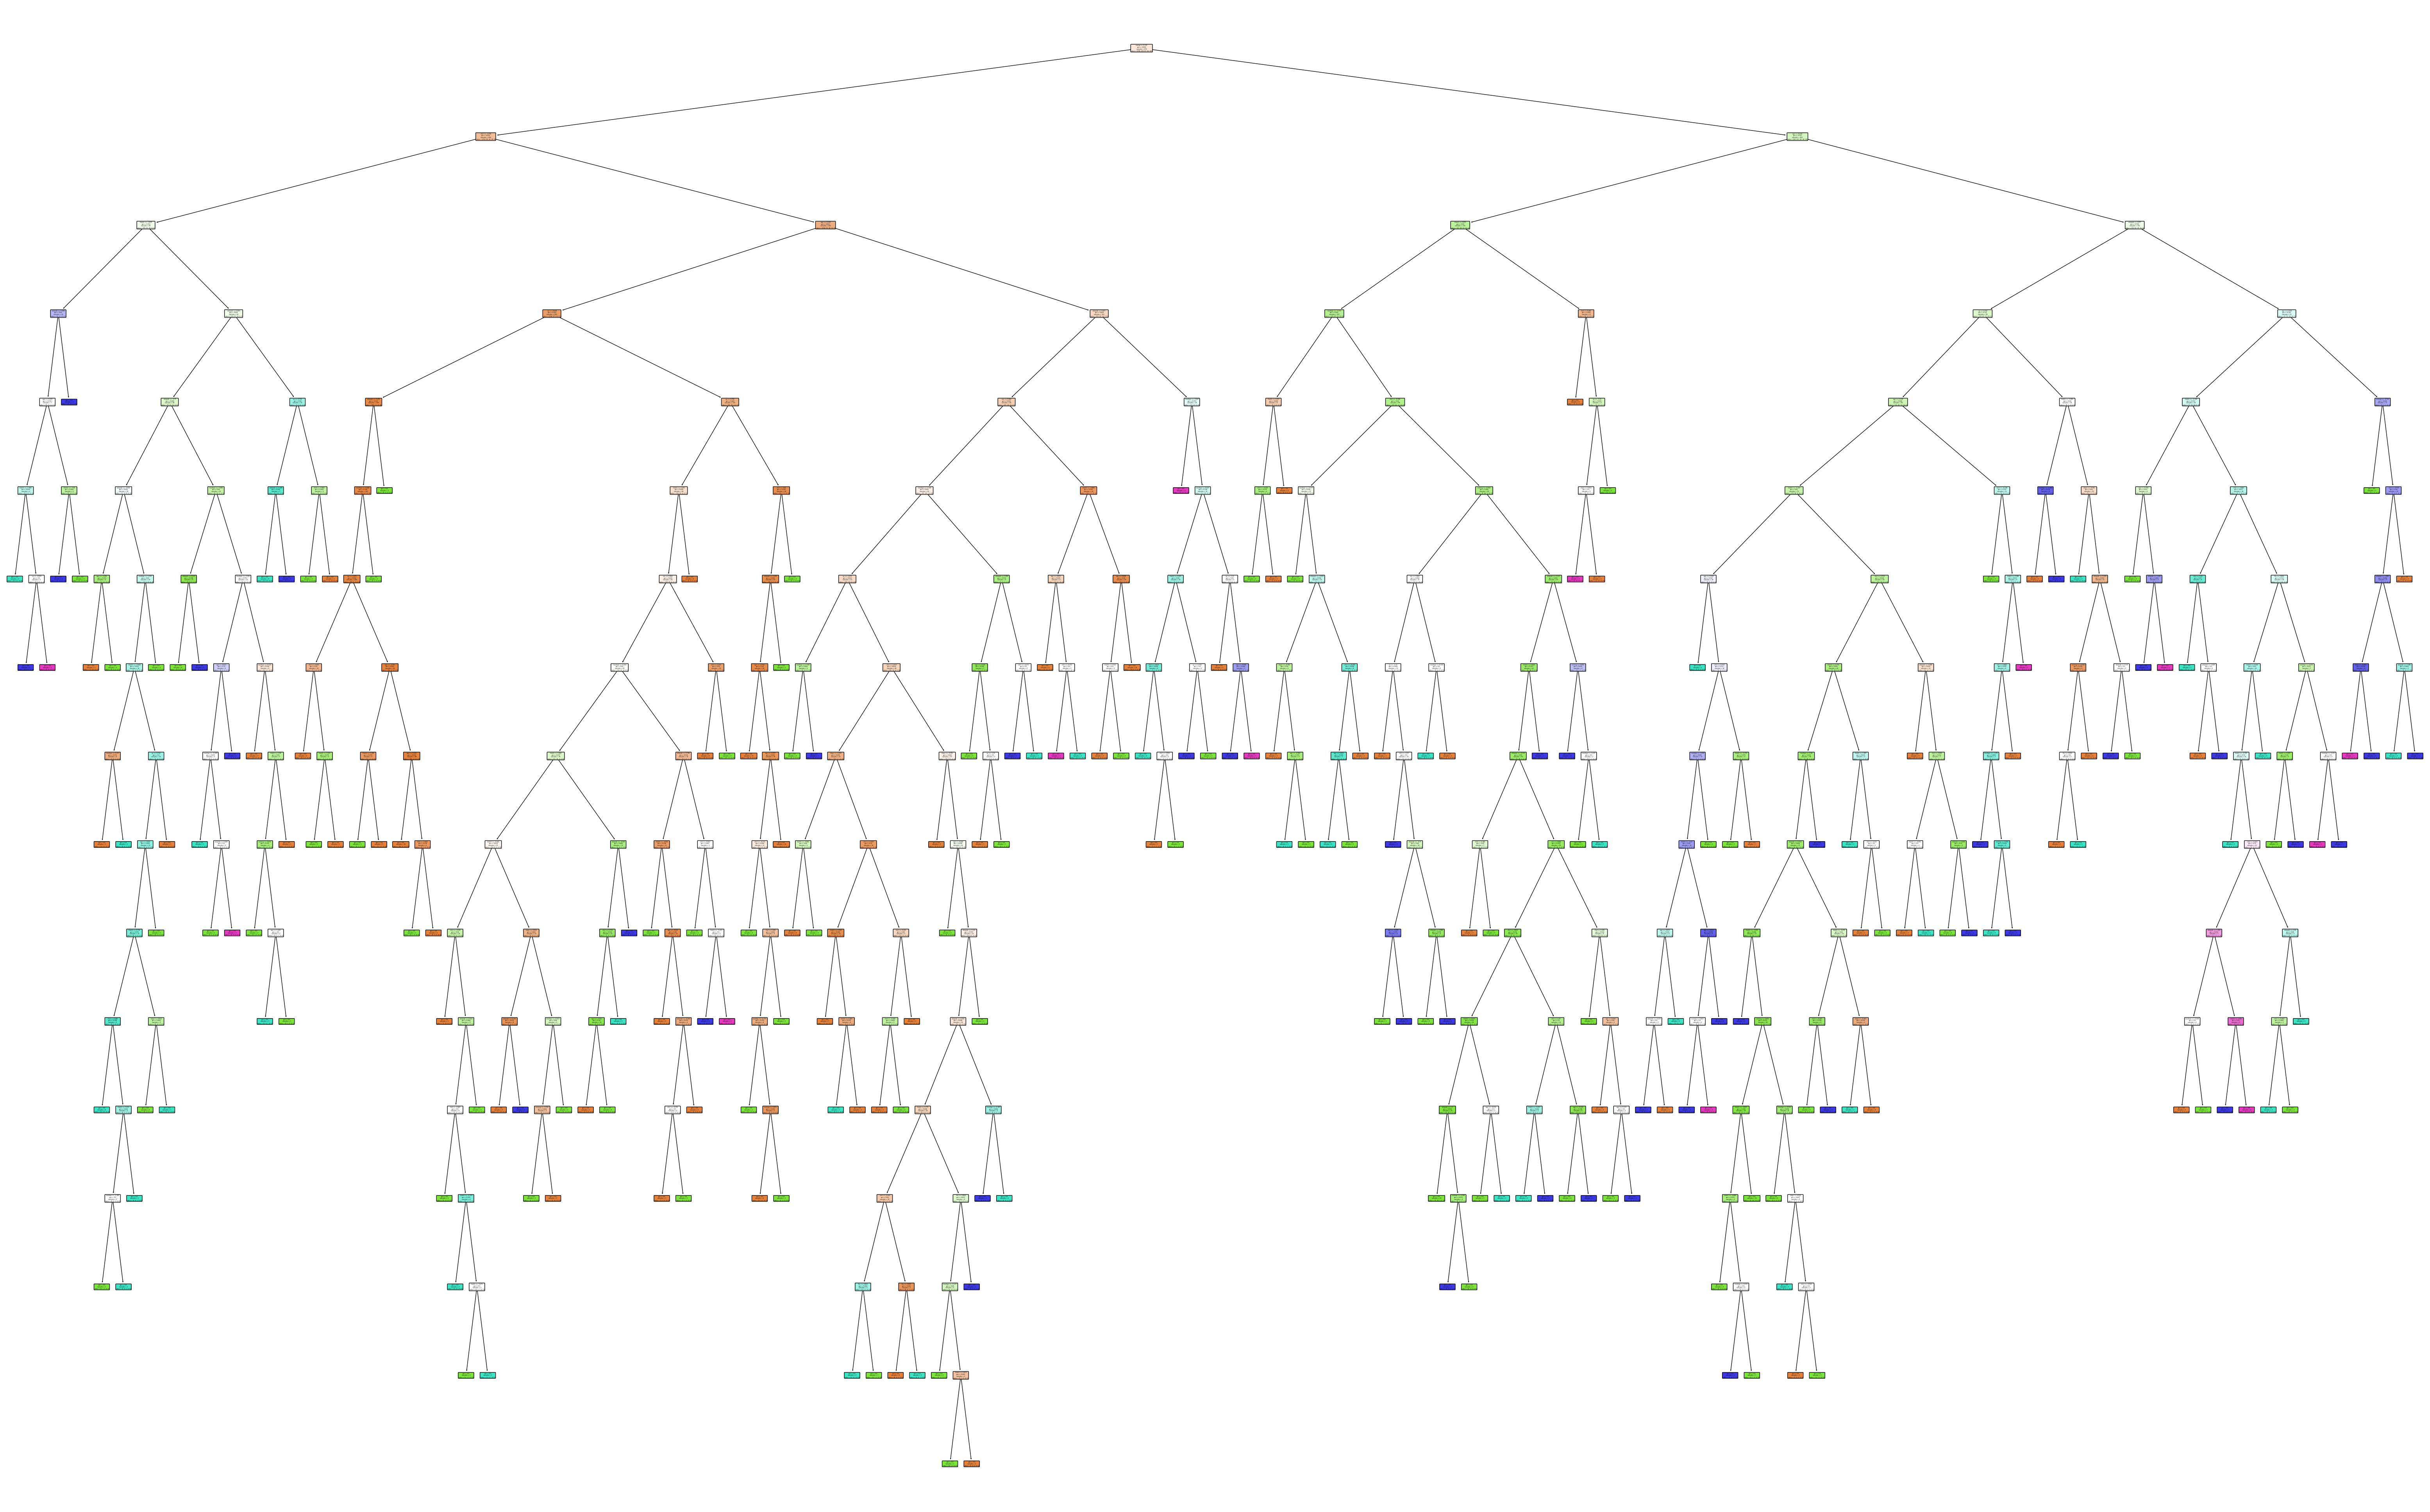

In [34]:
from matplotlib.pylab import rcParams
from sklearn.tree import plot_tree
rcParams['figure.figsize'] = 80,50
import graphviz
plot_tree(dt, feature_names=cols, rounded=True, filled=True)


In [36]:
#End of Assignment

# Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


#Answer- What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


Here are some common hyperparameters of decision tree models and how they affect the model's performance:

Criterion: This hyperparameter determines the function to measure the quality of a split. The two most common criteria are "gini" for the Gini impurity and "entropy" for the information gain. Gini impurity tends to be faster to compute, while entropy may create more balanced trees.

Max Depth: This hyperparameter restricts the maximum depth of the decision tree. A deeper tree can capture more complex patterns in the data but is also more prone to overfitting, especially with noisy datasets. Limiting the depth can help prevent overfitting.

Min Samples Split: This hyperparameter determines the minimum number of samples required to split an internal node. Setting a higher value for this parameter can prevent the model from making splits that only capture noise in the data, reducing overfitting.

Min Samples Leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps control overfitting by preventing the model from creating leaves with very few samples.

Max Features: This hyperparameter controls the number of features to consider when looking for the best split. It can help prevent overfitting and reduce the computational cost, especially for datasets with a large number of features.

Splitter: This hyperparameter determines the strategy used to choose the split at each node. The two options are "best" to choose the best split and "random" to choose the best random split. Using "random" can help prevent overfitting.

Class Weight: This hyperparameter assigns weights to classes to address class imbalance. It can be useful when the classes are unevenly distributed in the dataset.

Random State: This hyperparameter controls the randomness of the algorithm. Setting a random state ensures reproducibility of results across multiple runs.

Q2 Answer- What is the difference between the Label encoding and One-hot encoding?

Label encoding assigns a unique integer label to each category, while one-hot encoding represents each category with a binary vector. One-hot encoding is more commonly used in machine learning models, especially when dealing with nominal categorical variables, as it avoids introducing spurious relationships between categories.


1.Label Encoding:
In label encoding, each category is assigned a unique integer label.
The labels are typically assigned in alphabetical order or based on the frequency of occurrence in the dataset.
Label encoding is suitable for ordinal categorical variables, where there is a meaningful order among the categories.
However, using label encoding for nominal categorical variables (where there is no inherent order) can introduce unintended relationships between categories.
Example: In a dataset with colors as a categorical variable, label encoding might assign "red" as 0, "blue" as 1, and "green" as 

2.
One-Hot Encoding:
In one-hot encoding, each category is represented by a binary vector where only one element is 1 (hot), and all others are 0 (cold).
Each binary vector has a length equal to the number of unique categories in the original variable.
One-hot encoding is suitable for nominal categorical variables, where there is no inherent order among the categories.
One-hot encoding avoids introducing unintended relationships between categories, making it more suitable for machine learning algorithms.
Example: Using one-hot encoding on the same color variable would create three binary variables: "red" represented as [1, 0, 0], "blue" as [0, 1, 0], and "green" as [0, 0, 1].
        
        